# Import Packages

In [6]:
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Import datasets

In [2]:
X_train = pd.read_csv("./data/X_train.csv")
y_train = pd.read_csv("./data/y_train.csv")
X_test = pd.read_csv("./data/X_test.csv")
y_test = pd.read_csv("./data/y_test.csv")

# lightGBM

In [3]:
lgbm_reg = lgb.LGBMRegressor(objective='regression', 
                       learning_rate=0.01, 
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       verbose=-1,
                       random_state=42)

param_grid_lgbm = {'num_leaves': [3, 6, 9],
                   'min_sum_hessian_in_leaf': [3, 7, 11],
                   'n_estimators': [1000, 5000, 7000]}

lgbm_grid_search = GridSearchCV(lgbm_reg,
                        param_grid_lgbm,
                        cv = 4,
                        verbose=True,
                        scoring='neg_mean_squared_error')

lgbm_grid_search.fit(X_train, y_train)
print(lgbm_grid_search.best_score_)
print(lgbm_grid_search.best_params_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
-765276605.2044417
{'min_sum_hessian_in_leaf': 3, 'n_estimators': 5000, 'num_leaves': 6}


In [3]:
lgbm_reg_best = lgb.LGBMRegressor(objective='regression', 
                                  learning_rate=0.01, 
                                  max_bin=200, 
                                  bagging_fraction=0.8,
                                  bagging_freq=4, 
                                  bagging_seed=8,
                                  feature_fraction=0.2,
                                  feature_fraction_seed=8,
                                  verbose=-1,
                                  random_state=42, 
                                  min_sum_hessian_in_leaf = 3,
                                  n_estimators = 5000, 
                                  num_leaves = 6)
lgbm_reg_best.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=3, n_estimators=5000,
              num_leaves=6, objective='regression', random_state=42,
              verbose=-1)

In [4]:
lgbm_y_pred = lgbm_reg_best.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, lgbm_y_pred))
print("Root Mean Square Error of the Best LGBM model:", rmse_test)

Root Mean Square Error of the Best LGBM model: 29708.807230839495


# XGBoost

In [27]:
xgboost = xgb.XGBRegressor(learning_rate=0.01,
                           min_child_weight=0,
                           colsample_bytree=0.7,
                           subsample=0.7,
                           nthread=-1,
                           scale_pos_weight=1,
                           reg_alpha=0.00006,
                           objective='reg:squarederror')
param_grid_xgb = {'n_estimators': [5000, 6000, 7000], 
                  'max_depth': [3, 4, 5],
                  'gamma': [0.5, 0.6, 0.8]}

xgb_grid_search = GridSearchCV(xgboost,
                        param_grid_xgb,
                        cv = 4,
                        verbose=True,
                        scoring='neg_mean_squared_error')

xgb_grid_search.fit(X_train, y_train)
print(xgb_grid_search.best_score_)
print(xgb_grid_search.best_params_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
-670676656.609467
{'gamma': 0.5, 'max_depth': 5, 'n_estimators': 5000}


In [28]:
xgboost_best = xgb.XGBRegressor(learning_rate=0.01,
                                min_child_weight=0,
                                colsample_bytree=0.7,
                                subsample=0.7,
                                nthread=-1,
                                scale_pos_weight=1,
                                reg_alpha=0.00006,
                                objective='reg:squarederror',
                                gamma=0.5, 
                                max_depth=5,
                                n_estimators=5000)
xgboost_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [29]:
xgboost_y_pred = xgboost_best.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, xgboost_y_pred))
print("Root Mean Square Error of the Best LGBM model:", rmse_test)

Root Mean Square Error of the Best LGBM model: 32579.460568344257


# Random Forest

In [19]:
rf = RandomForestRegressor(min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42)

param_grid_rf = {'min_samples_split': [3, 5, 7],
                 'max_depth': [10, 15, 20],
                 'n_estimators': [600, 1200, 1800]}

rf_grid_search = GridSearchCV(rf,
                        param_grid_rf,
                        cv = 4,
                        verbose=True,
                        scoring='neg_mean_squared_error')

rf_grid_search.fit(X_train, y_train.values.ravel())
print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
-926870632.3007333
{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 1800}


In [21]:
rf_best = RandomForestRegressor(min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42,
                           min_samples_split=3,
                           max_depth=20,
                           n_estimators=1800)
rf_best.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=1800, oob_score=True,
                      random_state=42)

In [24]:
rf_pred = rf_best.predict(X_test)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Root Mean Square Error of the Best LGBM model:", rf_rmse_test)

Root Mean Square Error of the Best LGBM model: 34837.58734973801


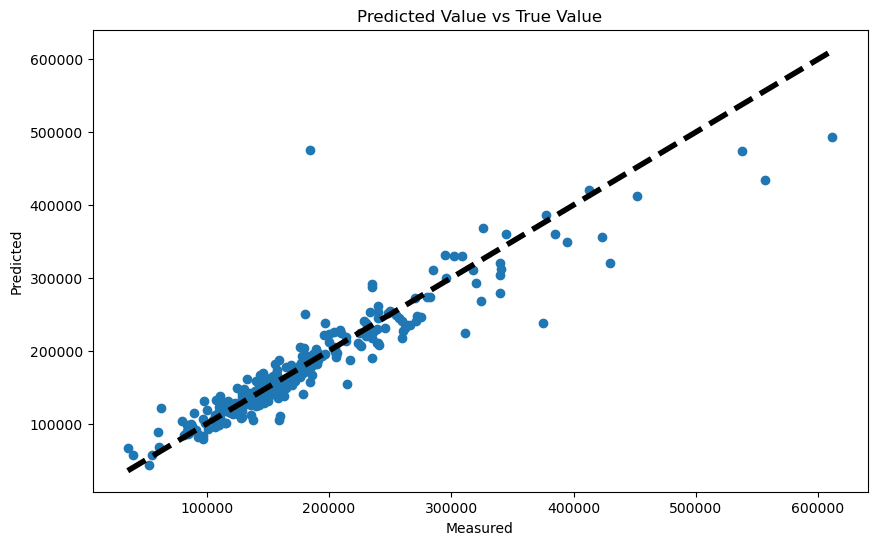

In [8]:
# Plotting the true vs predicted values for visual analysis
plt.figure(figsize=(10,6))
plt.scatter(y_test, lgbm_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Predicted Value vs True Value')
plt.show()